### 문제정의
- 버섯의 특징을 활용해 독/식용 버섯을 분류
- Decision tree 시각화
- 특성선택(Feature selection) 해보기

In [81]:
### 불러오기 
import pandas as pd
from sklearn.model_selection import train_test_split   ### 데이터 7:3 등으로 분리 가능
from sklearn.tree import DecisionTreeClassifier

In [82]:
data=pd.read_csv('./data/mushroom.csv')
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [83]:
data.shape

(8124, 23)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### 문제와 답 나누기

In [85]:
X=data.iloc[:,1:]
y=data['poisonous']  ### data.iloc[:,0]

#### 라벨 인코딩

In [86]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [87]:
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [88]:
h_dic={
    'u' :2,
    'g' :1,
    'm' :3,
    'd' :5,
    'p' :4,
    'w' :6,
    'l' :7
}

In [89]:
X['habitat'].map(h_dic)

0       2
1       1
2       3
3       2
4       1
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

#### 원핫인코딩

In [90]:
X_one_hot = pd.get_dummies(X)
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


#### 7:3 비율로 나누기
- X_train, X_test, y_train, y_test

In [91]:
###data['poisonous']
###data.iloc[:,1:]
X_train, X_test,y_train,y_test=train_test_split(X_one_hot,y,  
                                               test_size=0.3,
                                               random_state=1)

In [92]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5686, 117)
(2438, 117)
(5686,)
(2438,)


In [93]:
y.value_counts()   ### 한쪽에 치우치지 않은 적절한 데이터다

e    4208
p    3916
Name: poisonous, dtype: int64

In [94]:
tree=DecisionTreeClassifier()   ### 디폴트 값으로 진행
tree.fit(X_train,y_train)       ### 기존 데이터들은 오브젝트(스트링) 이다 학습할 때 숫자이어야 한다. 불순도계산

DecisionTreeClassifier()

In [95]:
pre=tree.predict(X_test)

In [96]:
### 예측 불러오기
from sklearn import metrics

In [97]:
metrics.accuracy_score(pre,y_test)

1.0

### 시각화

In [98]:
from sklearn.tree import export_graphviz   ### 그레비즈 형태로 내보낼 것이다
export_graphviz(tree, out_file='tree.dot',
                class_names=['독','식용'],
               feature_names=X_one_hot.columns,
               filled=True)   ### tree.dot 형태로 내보낼 것이다   ### filled는 클래스별 색깔 구분이다

In [99]:
#!pip install graphviz

In [100]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

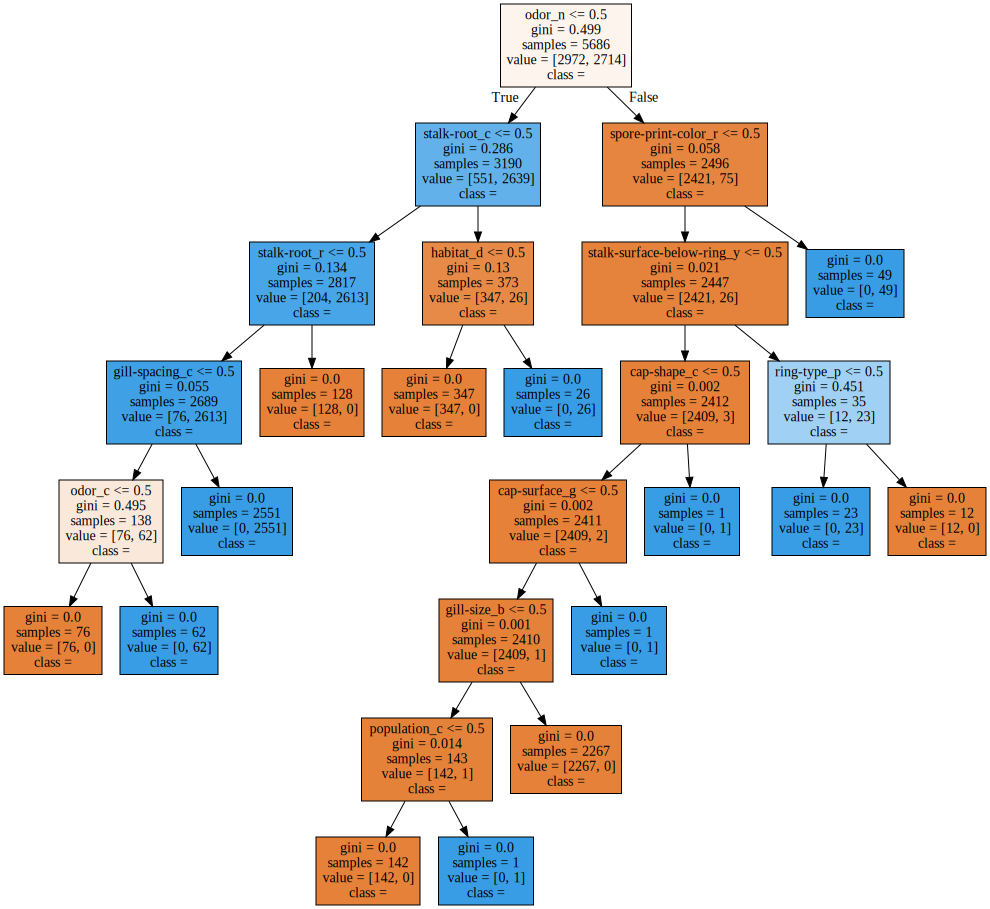

In [101]:
import graphviz

with open('./tree.dot', encoding='UTF8') as f:
    dot_graph=f.read()
    
display(graphviz.Source(dot_graph) )

### 특성선택
- tree모델의 특성중요도

In [102]:
f=tree.feature_importances_

In [103]:
im_df=pd.DataFrame(f,index=X_one_hot.columns)
im_df.sort_values(by=0,ascending=False)

,0
odor_n,0.627391
stalk-root_c,0.170885
stalk-root_r,0.081332
spore-print-color_r,0.033148
gill-spacing_c,0.027991
...,...
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_n,0.000000
gill-spacing_w,0.000000
